# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  

output_data_file


'output_data/cities.csv'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# weather_url
units = "imperial" 


#get from doc &q
# query_url = f"(url+ appid =(weather_api_key)&units=(unit)&q="
# query_url

query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=6d987dcb0699091a9eee0d01a310631b&units=imperial&q=


In [5]:

# city_response = requests.get(query_url + city)
# city_json = city_response.json()
# city_json = requests.get(query_url + "&q=" + city).json()

# city_json = city_response.json()
# print(city_json)


In [6]:
#lists to hold data needed for plots
city_name = []
country = []
lon = []
lat = []
temp = []
max_temp = []
humidity = []
clouds = []
wind = []

# set up retrieval of data from json
#i nclude a print log of each city as it'sbeing processed (with the city number and city name).
 
city_number = 1

for city in cities:
    
    final_url = query_url + city
#         
    response = requests.get(final_url).json()
                            
    try: 
        
# #       
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        print(f" Processing... {city_number} | {city}")        
        city_number = city_number + 1
                            
    except:
        
# #         print(f" Processing... {city_number} | {city}")
         print(f" Incomplete Info ... Next Record.")
         city_number += 1 

#         print(response)


 Processing... 1 | mar del plata
 Processing... 2 | albany
 Processing... 3 | thinadhoo
 Processing... 4 | hasaki
 Processing... 5 | mataura
 Processing... 6 | bengkulu
 Processing... 7 | karratha
 Processing... 8 | broken hill
 Processing... 9 | evensk
 Processing... 10 | gamba
 Processing... 11 | castro
 Processing... 12 | rikitea
 Processing... 13 | chernyshevskiy
 Processing... 14 | tazovskiy
 Processing... 15 | nikolskoye
 Incomplete Info ... Next Record.
 Processing... 17 | pisco
 Processing... 18 | iqaluit
 Processing... 19 | port alfred
 Processing... 20 | dalbandin
 Processing... 21 | klaksvik
 Incomplete Info ... Next Record.
 Processing... 23 | aksarka
 Processing... 24 | palembang
 Processing... 25 | jamestown
 Processing... 26 | ampanihy
 Processing... 27 | carnarvon
 Processing... 28 | wiarton
 Processing... 29 | barrow
 Processing... 30 | new norfolk
 Processing... 31 | cidreira
 Processing... 32 | bambous virieux
 Processing... 33 | guerrero negro
 Incomplete Info ... N

 Processing... 271 | dongsheng
 Processing... 272 | lorengau
 Processing... 273 | belaya gora
 Processing... 274 | jumla
 Processing... 275 | akyab
 Processing... 276 | zhigansk
 Processing... 277 | mahebourg
 Processing... 278 | bandarbeyla
 Processing... 279 | manzil salim
 Processing... 280 | save
 Processing... 281 | ponta delgada
 Processing... 282 | aswan
 Processing... 283 | reconquista
 Incomplete Info ... Next Record.
 Processing... 285 | karasburg
 Processing... 286 | sakakah
 Processing... 287 | srandakan
 Processing... 288 | bathsheba
 Processing... 289 | saint george
 Processing... 290 | nyuksenitsa
 Processing... 291 | luebo
 Processing... 292 | brae
 Processing... 293 | banda aceh
 Processing... 294 | bethel
 Processing... 295 | ostrovnoy
 Processing... 296 | dikson
 Processing... 297 | san policarpo
 Processing... 298 | port harcourt
 Processing... 299 | katsuura
 Processing... 300 | novikovo
 Processing... 301 | kuliyapitiya
 Processing... 302 | tanabe
 Processing... 3

 Processing... 539 | biak
 Processing... 540 | netphen
 Processing... 541 | shieli
 Processing... 542 | bathurst
 Processing... 543 | weinan
 Processing... 544 | bam
 Processing... 545 | mirnyy
 Processing... 546 | santiago
 Incomplete Info ... Next Record.
 Processing... 548 | srednekolymsk
 Processing... 549 | cabedelo
 Processing... 550 | elliot lake
 Processing... 551 | barra patuca
 Processing... 552 | maragogi
 Processing... 553 | lata
 Processing... 554 | ikalamavony
 Incomplete Info ... Next Record.
 Processing... 556 | ballarat
 Processing... 557 | panlaitan
 Processing... 558 | presidente medici
 Incomplete Info ... Next Record.
 Processing... 560 | blackpool
 Processing... 561 | veracruz
 Processing... 562 | kirkwall
 Processing... 563 | sistranda
 Processing... 564 | baneh
 Processing... 565 | cortez
 Processing... 566 | catamayo
 Processing... 567 | muros
 Processing... 568 | porto walter
 Processing... 569 | storforshei
 Processing... 570 | calderitas
 Processing... 571 |

In [ ]:
# print(city_name)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
city_weather_df = pd.DataFrame({
                                "City": city_name,
                                "Country": country,
                                "Latitude": lat,
                                "Longitude": lon,
                                "Temperature": temp,
                                "Max Temperature": max_temp,
                                "Humidity": humidity,
                                "Clouds": clouds,
                                "Wind": wind
                                
                                })

# city_weather_df

city_weather_df.to_csv("city_weather.csv",index = False)
city_weather_df.head()


,City,Country,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind
0,Mar del Plata,AR,-38.0023,-57.5575,48.22,48.22,53,0,4.61
1,Albany,US,42.6001,-73.9662,81.10,84.67,71,81,1.01
2,Thinadhoo,MV,0.5333,72.9333,81.54,81.54,74,70,5.53
3,Hasaki,JP,35.7333,140.8333,75.60,75.60,82,85,7.27
4,Mataura,NZ,-46.1927,168.8643,43.48,43.48,97,19,3.09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_over_hundred = city_weather_df.loc[city_weather_df["Humidity"]>100]
humidity_over_hundred


,City,Country,Latitude,Longitude,Temperature,Max Temperature,Humidity,Clouds,Wind


In [9]:
#  Get the indices of cities that have humidity over 100%.


# Null   skip step 


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

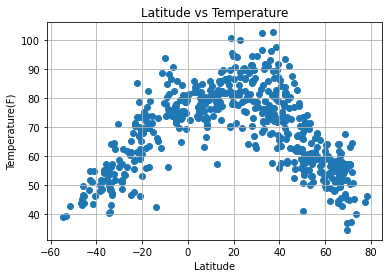

In [11]:
#Activity 2-5

plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature"])

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(True)
#save the figure
plt.savefig("Latitude vs Temp.png")
plt.show()


In [12]:
# This plot shows that the higher temperatures are grouped near -10 to 40 degrees from the Equator (Latitude = 0 degrees).
# Whereas the cooler temperatures occur further away from the Equator.  

## Latitude vs. Humidity Plot

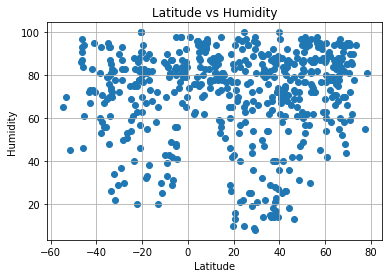

In [13]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"])

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
#save the figure
plt.savefig("Latitude vs Humidity.png")
plt.show()


In [14]:
# Although the range of humidity(%) seems to be evenly distributed throughout both hemispheres, the northern latitudes
# have more occurences of high humidity. 


## Latitude vs. Cloudiness Plot

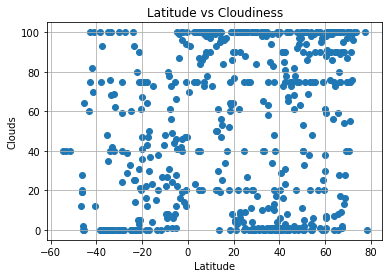

In [15]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Clouds"])

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid(True)
#save the figure
plt.savefig("Latitude vs Cloudiness.png")
plt.show()


In [16]:
# The highest frequency of cloudiness occurs in the northern hemisphere. 

## Latitude vs. Wind Speed Plot

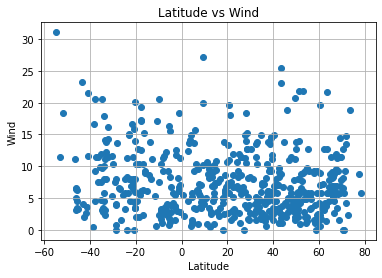

In [17]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind"])

plt.title("Latitude vs Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.grid(True)
#save the figure
plt.savefig("Latitude vs Wind Speed.png")
plt.show()


In [18]:
# Wind speeds are similar across the middle latitudes while the extreme regions +- 75 degrees latitude, except
# for a few instances, seem to have low occurrences of high winds. 

## Linear Regression

In [19]:
# activity 2-7

# # Perform a linear regression on temperature vs. latitude
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)



<function matplotlib.pyplot.show(*args, **kw)>

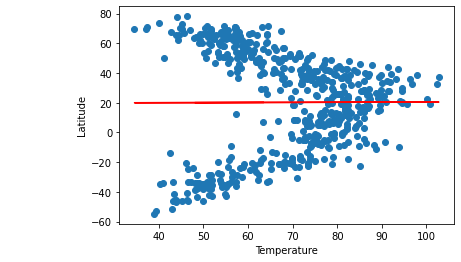

In [20]:
#matplotlib 3-8 and 3-9

x_values = city_weather_df["Temperature"]
y_values = city_weather_df["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show


In [21]:
Temps evenly distributed throughout latitudes (90)to(-90). No Correlation noted

SyntaxError: invalid syntax (<ipython-input-21-0f3f3370ee58>, line 1)

In [22]:
#Split DF into Northern and Southern Hemi

north_hemi = city_weather_df.loc[city_weather_df["Latitude"] >= 0]
south_hemi = city_weather_df.loc[city_weather_df["Latitude"] < 0]

# south_hemi.head()
# north_hemi.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

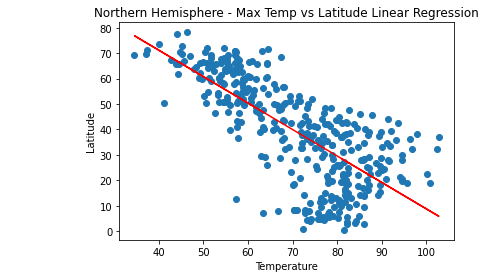

In [23]:
x_values = north_hemi["Temperature"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show


In [24]:
# The temperatures increase as latitude approaches the equator (lat 0) and decreases as the latitude
# approaches the North Pole (lat 90) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

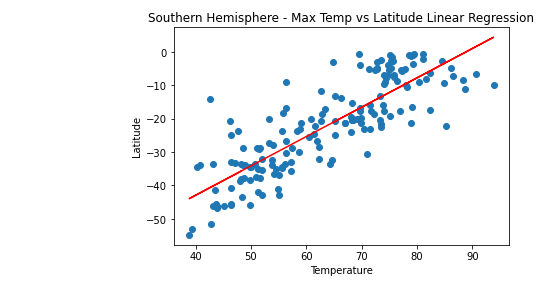

In [25]:
x_values = south_hemi["Temperature"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show


In [26]:
# The temperatures increase as latitude approaches the equator (lat 0) and decreases as the latitude
# approaches the South Pole (lat -90) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

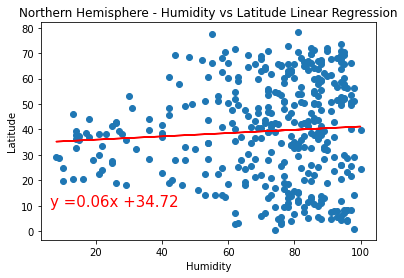

In [27]:
x_values = north_hemi["Humidity"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show


In [28]:
# Humidity levels in the Northern Hemisphere are evenly distributed throughout. No correlation noted.  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

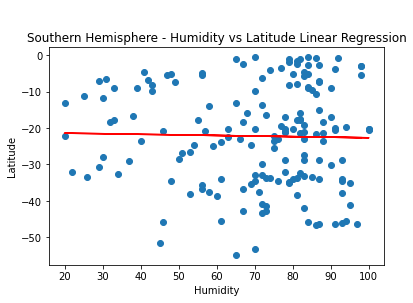

In [29]:
x_values = south_hemi["Humidity"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show


In [30]:
# Humidity levels in the Southern Hemisphere are evenly distributed throughout. No correlation noted. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

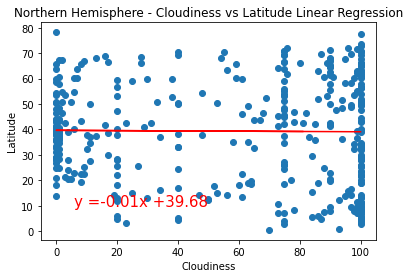

In [31]:
x_values = north_hemi["Clouds"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.show


In [32]:
# No strong correlation noted in N. Hemisphere regarding Cloudiness and Latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

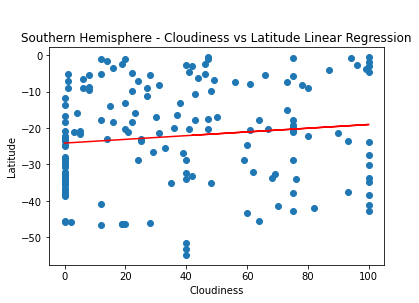

In [33]:
x_values = south_hemi["Clouds"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.show


In [34]:
# No strong correlation noted in S. Hemisphere regarding Cloudiness and Latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

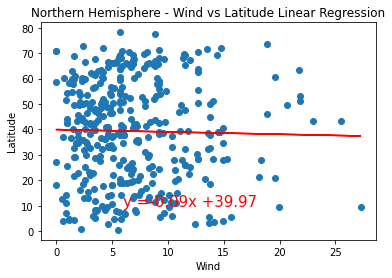

In [35]:
x_values = north_hemi["Wind"]
y_values = north_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind vs Latitude Linear Regression")
plt.xlabel("Wind")
plt.ylabel("Latitude")
plt.show


In [36]:
# No strong correlation noted in N. Hemisphere regarding Wind Speed and Latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

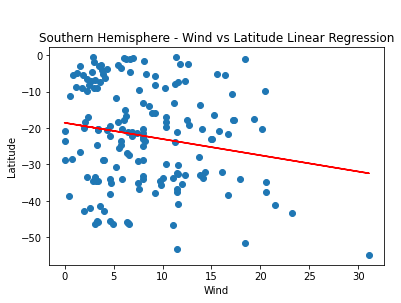

In [37]:
x_values = south_hemi["Wind"]
y_values = south_hemi["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind vs Latitude Linear Regression")
plt.xlabel("Wind")
plt.ylabel("Latitude")
plt.show


In [38]:
# No strong correlation noted in S. Hemisphere regarding Wind Speed and Latitude.